In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') /255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
autoencoder = Sequential()
autoencoder.add(Conv2D(16, kernel_size =3, padding = 'same', input_shape=(28, 28, 1), activation = 'relu'))
autoencoder.add(MaxPooling2D(pool_size = 2, padding = 'same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation= 'relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding = 'same', activation='relu'))

autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size =3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

autoencoder.compile(optimizer='adam', loss ='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 17s 7ms/step - loss: 0.2073 - val_loss: 0.1349
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1245 - val_loss: 0.1151
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1127 - val_loss: 0.1084
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1073 - val_loss: 0.1038
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1035 - val_loss: 0.1006
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1006 - val_loss: 0.0991
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0984 - val_loss: 0.0964
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0965 - val_loss: 0.0948
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0951 - val_loss: 0.0933
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0938 - val_loss: 0.092

In [8]:
random_test = np.random.randint(X_test.shape[0], size=5)

ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7,2))

<Figure size 504x144 with 0 Axes>

<Figure size 504x144 with 0 Axes>

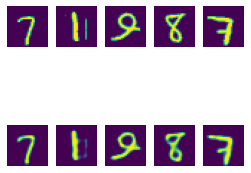

In [9]:
for i, image_idx in enumerate(random_test):
  ax = plt.subplot(2, 7, i+1)
  plt.imshow(X_test[image_idx].reshape(28,28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7+i+1)
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis('off')
plt.show()